<a href="https://colab.research.google.com/github/Sonali-Kotni57/Deep-Learning-Lab/blob/main/Experiment_2_CNN_Using_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment-2 CNN Using Transfer Learning**




**Import block**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from matplotlib import pyplot
import numpy as np

Dataset load

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data() 
print("training set:",x_train.shape,"\ntest set:",x_test.shape)

170500096/170498071 [==============================] - 4s 0us/step
training set: (50000, 32, 32, 3) 
test set: (10000, 32, 32, 3)


**Categorical Conversion**

In [3]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [4]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship', 'truck']

**Initial ploting of the dataset**

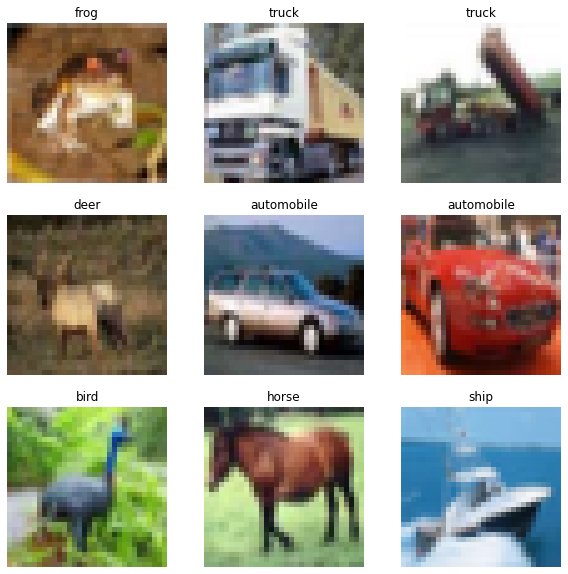

In [5]:
pyplot.figure(figsize=(10, 10))
for i in range(9):

  ax = pyplot.subplot(3, 3, i + 1)

  pyplot.imshow(tf.squeeze(x_train[i]))

  pyplot.title(labels[np.where(y_train[i]==1)[0][0]])

  pyplot.axis("off")

**Reshaping the train & test data**

In [6]:
x_train = np.array(x_train).reshape(x_train.shape[0], 32, 32, 3)
x_test = np.array(x_test).reshape(x_test.shape[0], 32, 32, 3)

**Normalization**

In [7]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
x_train.shape

(50000, 32, 32, 3)

**Plot after performing normalization**

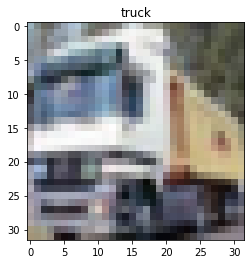

In [8]:
pyplot.imshow( tf.squeeze(x_train[1]) )
pyplot.title(labels[np.where(y_train[1]==1)[0][0]])
pyplot.show()

**Transfer Learning**

**Resnets()**

In [9]:
resnet = tf.keras.applications.ResNet50(include_top=False, weights='imagenet' )
print()
for layer in resnet.layers:
  print(layer.name)

94773248/94765736 [==============================] - 1s 0us/step

input_1
conv1_pad
conv1_conv
conv1_bn
conv1_relu
pool1_pad
pool1_pool
conv2_block1_1_conv
conv2_block1_1_bn
conv2_block1_1_relu
conv2_block1_2_conv
conv2_block1_2_bn
conv2_block1_2_relu
conv2_block1_0_conv
conv2_block1_3_conv
conv2_block1_0_bn
conv2_block1_3_bn
conv2_block1_add
conv2_block1_out
conv2_block2_1_conv
conv2_block2_1_bn
conv2_block2_1_relu
conv2_block2_2_conv
conv2_block2_2_bn
conv2_block2_2_relu
conv2_block2_3_conv
conv2_block2_3_bn
conv2_block2_add
conv2_block2_out
conv2_block3_1_conv
conv2_block3_1_bn
conv2_block3_1_relu
conv2_block3_2_conv
conv2_block3_2_bn
conv2_block3_2_relu
conv2_block3_3_conv
conv2_block3_3_bn
conv2_block3_add
conv2_block3_out
conv3_block1_1_conv
conv3_block1_1_bn
conv3_block1_1_relu
conv3_block1_2_conv
conv3_block1_2_bn
conv3_block1_2_relu
conv3_block1_0_conv
conv3_block1_3_conv
conv3_block1_0_bn
conv3_block1_3_bn
conv3_block1_add
conv3_block1_out
conv3_block2_1_conv
conv3_block2_1_b

**Building the model**

In [10]:
model = Sequential()
model.add(keras.applications.resnet50.ResNet50(input_shape = (32,32,3), include_top = False, weights = 'imagenet'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10,activation= 'softmax' ))
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy',metrics = "accuracy")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [11]:
model.summary()

Model: "sequential"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 23,851,274
Trainable params: 23,798,154
Non-trainable params: 53,120
_________________________________________________________________


**Freezing Layers**

In [12]:
model.trainable=False

**Training the model**

In [13]:
history = model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.33)

Epoch 1/5
262/262 [==============================] - 61s 91ms/step - loss: 1.5805 - accuracy: 0.4787 - val_loss: 7.1588 - val_accuracy: 0.0982
Epoch 2/5
262/262 [==============================] - 21s 79ms/step - loss: 0.7746 - accuracy: 0.7344 - val_loss: 3.5212 - val_accuracy: 0.1207
Epoch 3/5
262/262 [==============================] - 23s 88ms/step - loss: 0.4678 - accuracy: 0.8401 - val_loss: 2.3792 - val_accuracy: 0.3239
Epoch 4/5
262/262 [==============================] - 21s 80ms/step - loss: 0.2792 - accuracy: 0.9078 - val_loss: 1.0834 - val_accuracy: 0.6723
Epoch 5/5
262/262 [==============================] - 21s 80ms/step - loss: 0.1778 - accuracy: 0.9423 - val_loss: 0.9799 - val_accuracy: 0.7242


**Plot Training performance**

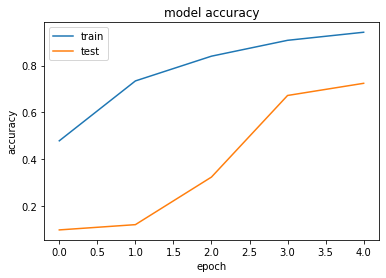

In [14]:
history.history
pyplot.plot(history.history[ 'accuracy' ])
pyplot.plot(history.history[ 'val_accuracy' ])
pyplot.title('model accuracy')
pyplot.ylabel( 'accuracy' )
pyplot.xlabel( 'epoch' )
pyplot.legend(['train', 'test'], loc='upper left' )
pyplot.show()
# summarize history for loss

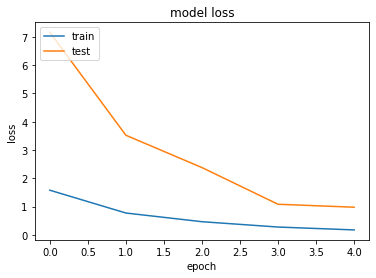

In [15]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history[ 'val_loss' ])
pyplot.title('model loss')
pyplot.ylabel('loss' )
pyplot.xlabel( 'epoch' )
pyplot.legend(['train', 'test'], loc='upper left' )
pyplot.show()

**Evaluation**

In [16]:
score = model.evaluate(x_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 0.9982 - accuracy: 0.7278


In [17]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9982193112373352
Test accuracy: 0.7278000116348267


**Prediction**

In [18]:
prediction = model.predict(x_test)


**Plot Prediction**


prediction


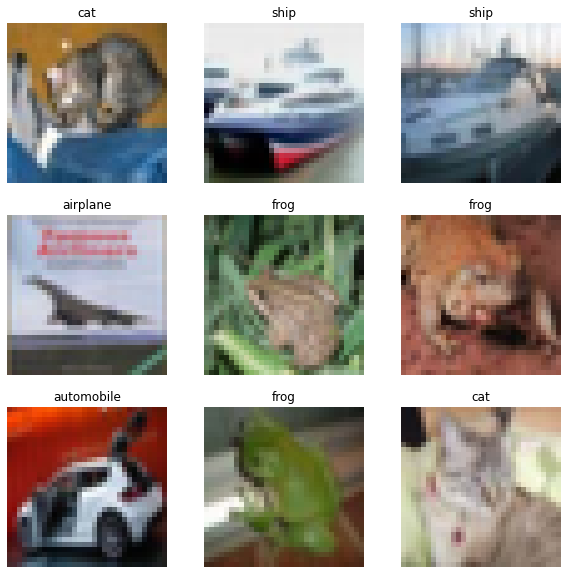

In [19]:
print("prediction" )
pyplot.figure(figsize=(10, 10))
for i in range(9):
  ax = pyplot.subplot(3, 3, i + 1)
  pyplot.imshow(tf.squeeze(x_test[i]))
  pyplot.title(labels[np.argmax(prediction[i])])
  pyplot.axis("off")